In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('temperature.csv')

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.shape

(7752, 25)

We have 7752 rows and 25 columns in our dataset

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are missing values in our dataset. So we will have to treat them.

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We have to perform feature engineering on Date column, rest all the features are numeric type. Also, we have our two target variable Next_Tmax and Next_Tmin.

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


1. We can see missing values in our dataset.

2. The difference between mean and 50th percentile shows data is skewed in LDAPS_WS, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4, Dem and slope.

3. The difference in 75th percentile and max values shows presence of outliers in DEM, Slope, Present_Tmin,LDAPS_RHmin,LDAPS_WS, LDAPS_LH, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 

In [6]:
df.dropna(axis=0,inplace=True)

We will drop all the null values as they are very less compared to our dataset

<AxesSubplot:>

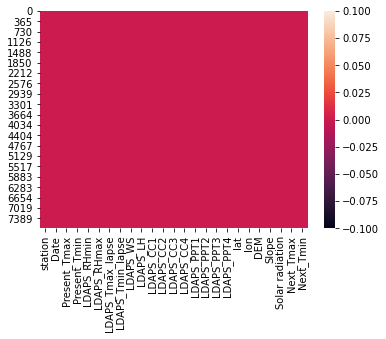

In [7]:
sns.heatmap(df.isnull())

We can see there are no missing values now.

<AxesSubplot:>

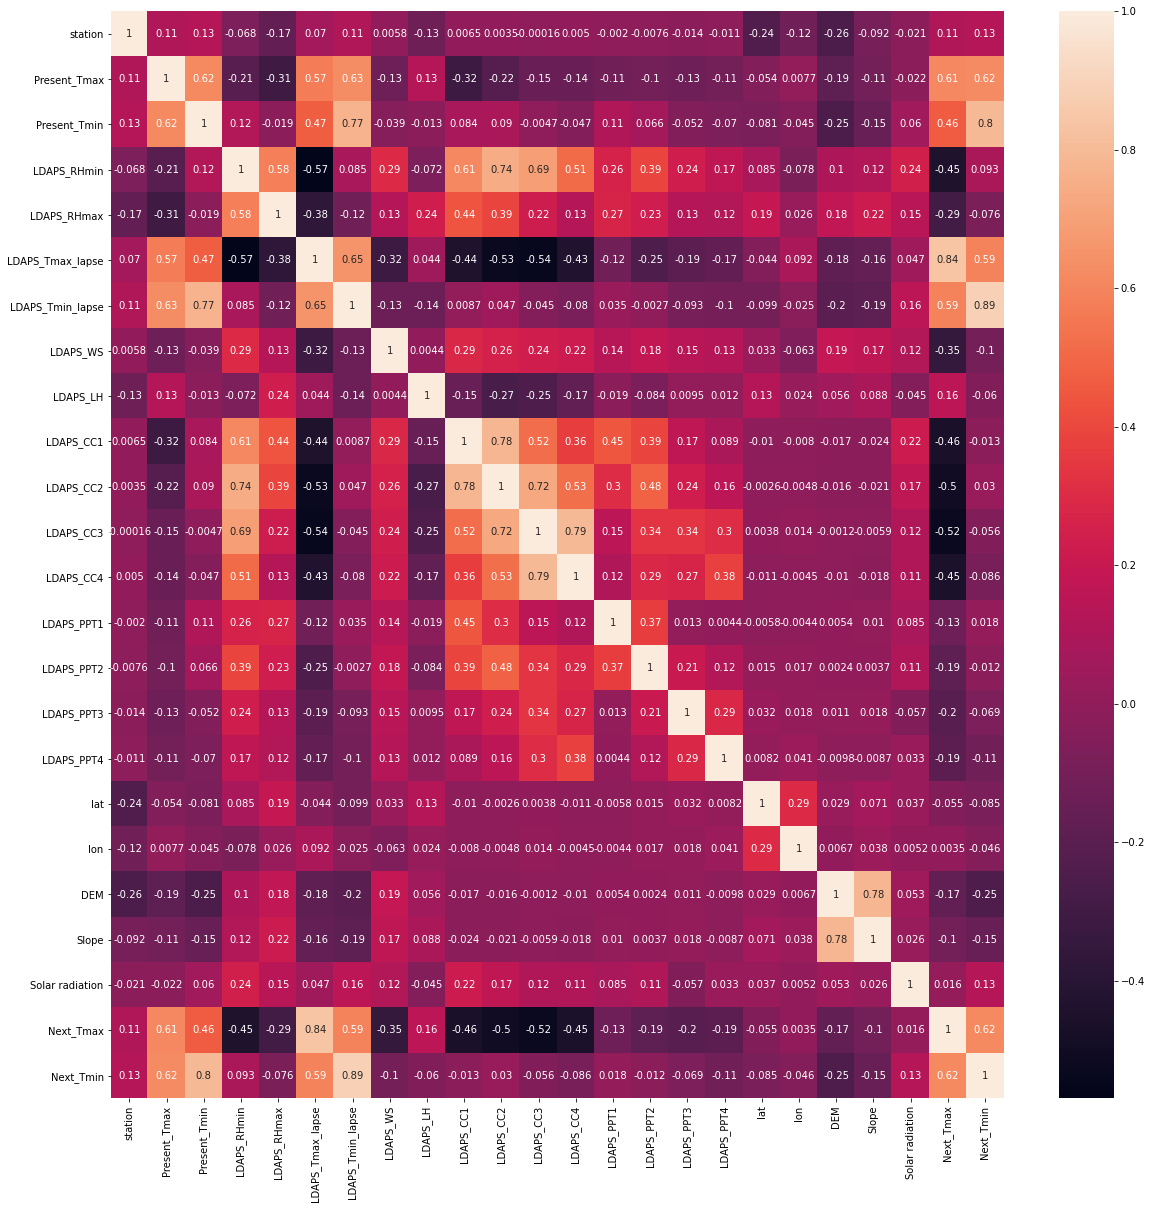

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

It shows Next_Tmax is highly correlated with  Present_Tmax, LDAPS_Tmax_lapse

Next_Tmin is highly correlated with Present_Tmin,LDAPS_RHmin and LDAPS_Tmin_lapse

<AxesSubplot:ylabel='Frequency'>

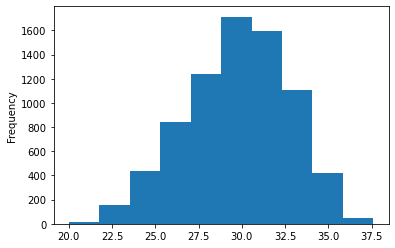

In [17]:
df['Present_Tmax'].plot.hist()

The maximum temp ranges between 20 degree to 37.5 degree with high spike at 30 degree

<AxesSubplot:ylabel='Frequency'>

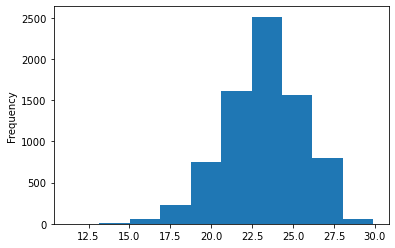

In [18]:
df['Present_Tmin'].plot.hist()

The min temperature for a day ranges between 13 degree to 30 degree with majority between 22.5 to 25.

<AxesSubplot:ylabel='Frequency'>

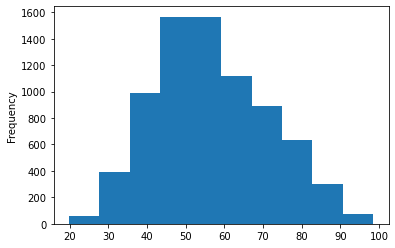

In [19]:
df['LDAPS_RHmin'].plot.hist()

next-day minimum relative humidity (%) lies between 20 to 98 % with high spike at 40-50%

<AxesSubplot:ylabel='Frequency'>

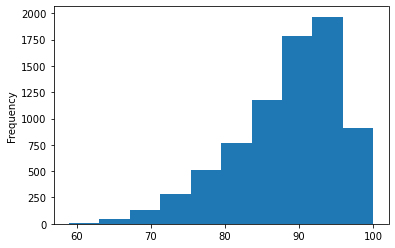

In [20]:
df['LDAPS_RHmax'].plot.hist()

Next day maximum relative humidity liesbetween 60 to 100 % which heavy spike after 80%

<AxesSubplot:ylabel='Frequency'>

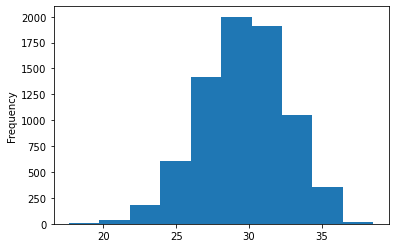

In [21]:
df['LDAPS_Tmax_lapse'].plot.hist()

next-day maximum air temperature applied lapse rate lies between 20 degree to 35 degree, with large spike at 30 degree

<AxesSubplot:ylabel='Frequency'>

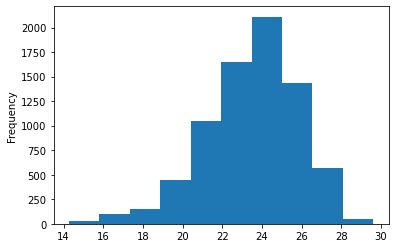

In [22]:
df['LDAPS_Tmin_lapse'].plot.hist()

next-day minimum air temperature applied lapse rate lies between 14 degree to 30 degree and highly concentrated at 24 degree

<AxesSubplot:ylabel='Frequency'>

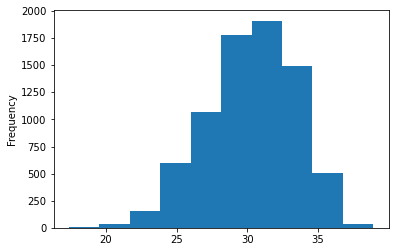

In [23]:
df['Next_Tmax'].plot.hist()

Nextday maximum temperature lies between 20 to 35 degree.

<AxesSubplot:ylabel='Frequency'>

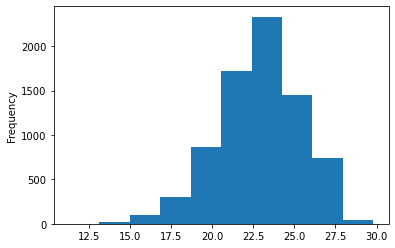

In [24]:
df['Next_Tmin'].plot.hist()

Next day minimum temperature lies between 13 to 30 degree

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

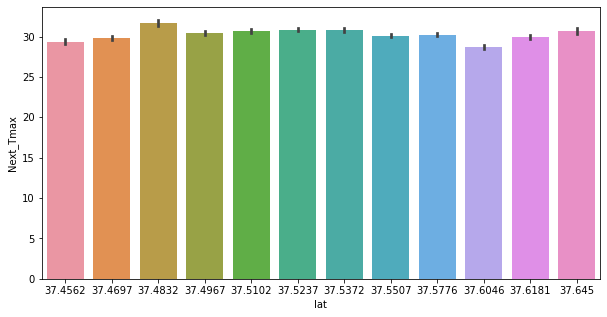

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='lat',y='Next_Tmax',data=df)

We have highest temperature at 37.4832degree latitude. Morover, we can see there is not much change in temp accordinng to latitude

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

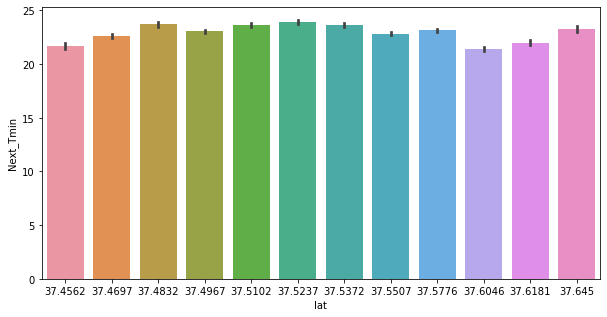

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='lat',y='Next_Tmin',data=df)

we have minimum temp recorded at 37.6046 degree latitude.

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

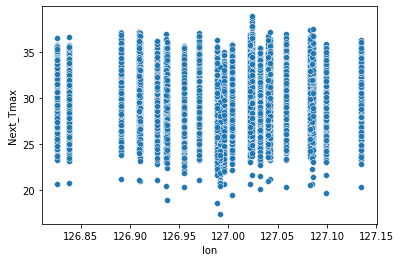

In [36]:
sns.scatterplot(x='lon',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

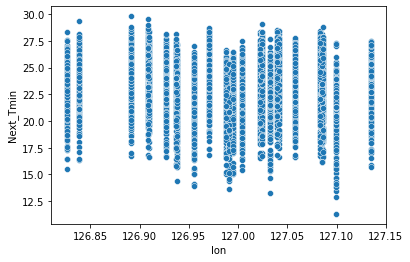

In [37]:
sns.scatterplot(x='lon',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

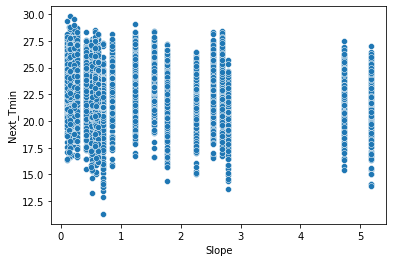

In [39]:
sns.scatterplot(x='Slope',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

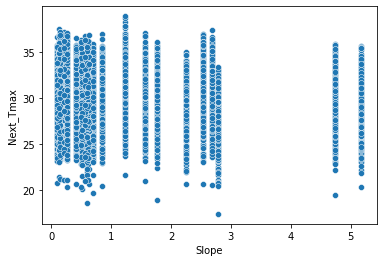

In [40]:
sns.scatterplot(x='Slope',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

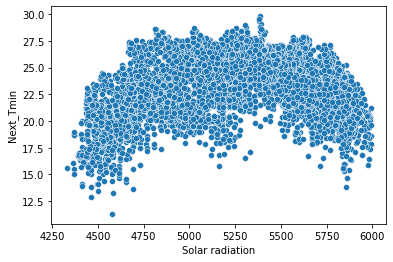

In [41]:
sns.scatterplot(x='Solar radiation',y='Next_Tmin',data=df)

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

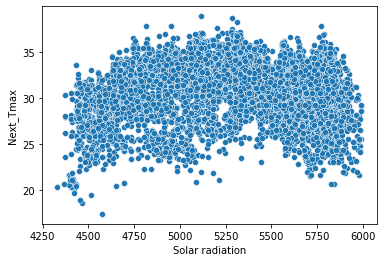

In [45]:
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=df)

In [9]:
#Extracting numerical column for further analysis
num_features = df.select_dtypes(include=[np.number])
num_features.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

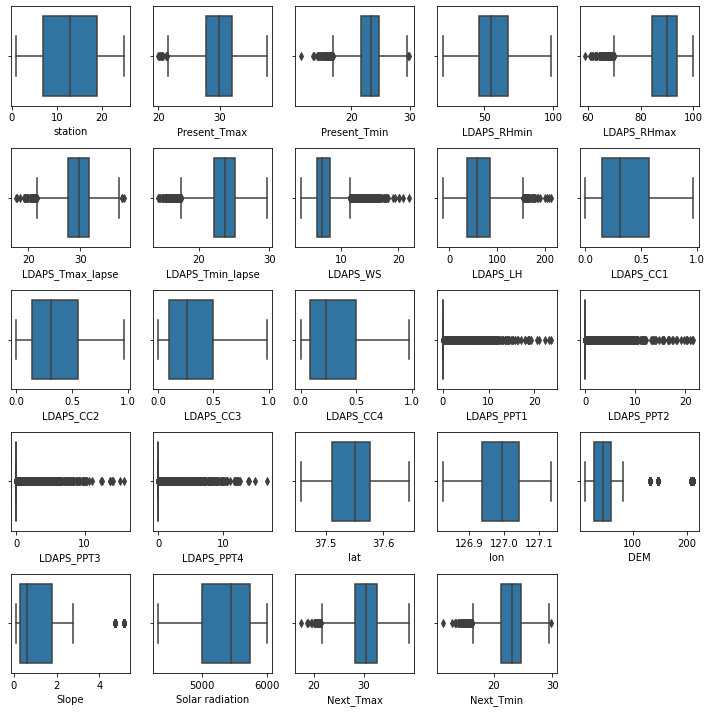

In [49]:
#Univariate Analysis
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(num_features[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can see presence of outliers in DEM, Slope, Present_Tmin,LDAPS_RHmin,LDAPS_WS, LDAPS_LH, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 

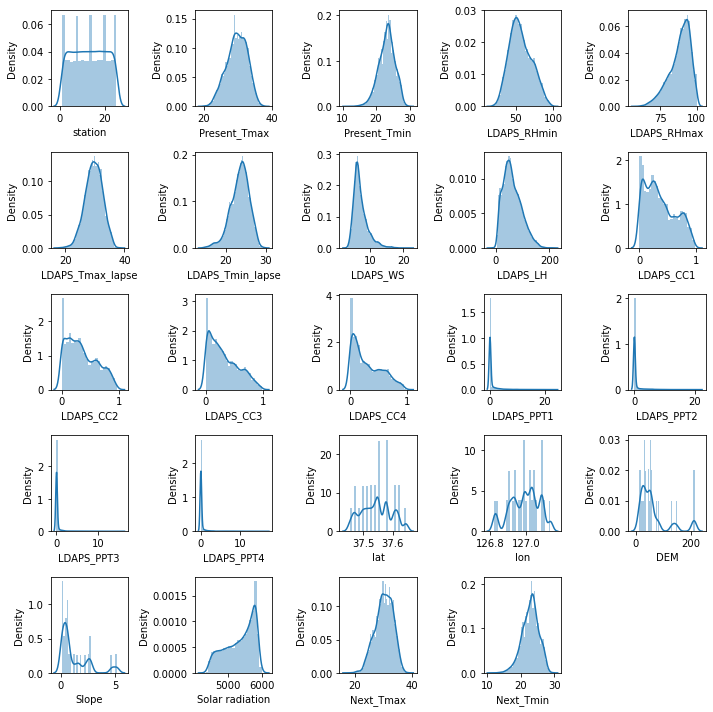

In [50]:
#Bivariate Analysis
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_features:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(num_features[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout() 

We can see data is skewed in LDAPS_WS, LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4, Dem and slope.

In [10]:
#Removing outliers using z-score
from scipy.stats import zscore
z=np.abs(zscore(num_features))

In [11]:
df=df[(z<3).all(axis=1)]
df.shape

(6739, 25)

After removing outliers, we have 6739 rows and 25 columns.

#### Feature Engineering for date column:

In [12]:
df.Date = pd.to_datetime(df.Date)

In [13]:
# extract month feature
months = df.Date.dt.month

In [14]:
# extract day of month feature
day_of_months = df.Date.dt.day

In [15]:
# extract year feature
year = df.Date.dt.year

In [16]:
df['Day']=day_of_months
df['Month']=months
df['Year']=year

In [17]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [18]:
#Now, we can drop the original date column
df.drop('Date',axis=1,inplace=True)

In [19]:
#Separting x1 and y1 for model evaluation for 'Next_Tmax' target variable
x1=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1=df[['Next_Tmax']]

In [20]:
#Separting y2 for model evaluation for 'Next_Tmin' target variable
y2=df[['Next_Tmin']]

In [21]:
#Checling the skewness
x1.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [27]:
#Treating the skewness
for i in x1.columns:
    if x1[i].skew()>0.5:
        x1[i]=np.cbrt(x1[i])
    if x1[i].skew()<-0.5:
         x1[i]=np.square(x1[i])

x1.skew() 

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.195638
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.461816
LDAPS_LH           -0.269287
LDAPS_CC1           0.146590
LDAPS_CC2           0.037633
LDAPS_CC3           0.226763
LDAPS_CC4          -0.419106
LDAPS_PPT1          0.680808
LDAPS_PPT2          0.915020
LDAPS_PPT3          1.037711
LDAPS_PPT4          1.411440
lat                 0.106983
lon                -0.277547
DEM                 0.475682
Slope               0.254901
Solar radiation    -0.424957
Day                 0.256528
Month              -0.158231
Year                0.025066
dtype: float64

In [28]:
#lets bring all features to a common scale
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_=mm.fit_transform(x1)
x_=pd.DataFrame(x_,columns=x1.columns)
x_

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year
0,0.000000,0.457317,0.384058,0.503580,0.612179,0.405939,0.493730,0.533952,0.819611,0.388190,...,0.0,0.0,0.786017,0.533981,1.000000,0.813008,1.000000,0.958333,0.374067,0.0
1,0.041667,0.652439,0.398551,0.425122,0.593016,0.510782,0.572443,0.417647,0.769093,0.378798,...,0.0,0.0,0.786017,0.666667,0.439372,0.364378,0.912756,0.958333,0.374067,0.0
2,0.083333,0.634146,0.521739,0.378341,0.372495,0.524981,0.613070,0.465966,0.637181,0.360473,...,0.0,0.0,0.643008,0.750809,0.336523,0.211093,0.908736,0.958333,0.374067,0.0
3,0.125000,0.658537,0.528986,0.503372,0.833528,0.502163,0.518173,0.412947,0.809649,0.368497,...,0.0,0.0,1.000000,0.634304,0.446749,0.785736,0.904139,0.958333,0.374067,0.0
4,0.166667,0.621951,0.420290,0.476325,0.576444,0.467303,0.530446,0.422459,0.906300,0.290444,...,0.0,0.0,0.500530,1.000000,0.354073,0.360310,0.905943,0.958333,0.374067,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,0.833333,0.115854,0.123188,0.064083,0.220076,0.390512,0.133581,0.513094,0.555478,0.144084,...,0.0,0.0,0.500530,0.692557,0.255125,0.390335,0.044309,0.958333,0.566612,1.0
6735,0.875000,0.079268,0.094203,0.134863,0.364154,0.325137,0.096143,0.426129,0.851104,0.167756,...,0.0,0.0,0.286017,0.841424,0.193602,0.061657,0.036778,0.958333,0.566612,1.0
6736,0.916667,0.128049,0.072464,0.090954,0.234809,0.304315,0.169770,0.467085,0.826373,0.098789,...,0.0,0.0,0.429025,0.210356,0.077451,0.093957,0.037577,0.958333,0.566612,1.0
6737,0.958333,0.128049,0.115942,0.055594,0.197372,0.343153,0.166542,0.507139,0.753649,0.111212,...,0.0,0.0,0.357521,0.268608,0.112499,0.171146,0.034966,0.958333,0.566612,1.0


In [29]:
from sklearn.model_selection import train_test_split

### Finding the best random state for 'Next_Tmax':

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_,y1,test_size=.20,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7848048213860919  on Random_state  84


### Model Evaluation for Next_Tmax Target Variable

In [31]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_,y1,test_size=.20,random_state=maxRS)

In [32]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [33]:
model=[DecisionTreeRegressor(),SVR(), KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
1.0
error: 
Mean absolute error:  0.974851632047478
Mean squared error:  1.854057863501484
Root mean squared error:  1.361637934071126
r2_score 0.7923745991659328



SVR()
0.8662333806156568
error: 
Mean absolute error:  0.7617237699883986
Mean squared error:  1.098294986058911
Root mean squared error:  1.0479956994467634
r2_score 0.8770081877143393



KNeighborsRegressor()
0.8763657319692308
error: 
Mean absolute error:  0.928486646884273
Mean squared error:  1.5397335311572695
Root mean squared error:  1.2408599965980327
r2_score 0.8275739943841695



RandomForestRegressor()
0.9849168709238507
error: 
Mean absolute error:  0.6607270029673586
Mean squared error:  0.7782981053412463
Root mean squared error:  0.8822120523668028
r2_score 0.9128428193796002



LinearRegression()
0.7511366923457294
error: 
Mean absolute error:  1.0580640526609157
Mean squared error:  1.9216546313405471
Root mean squared error:  1.3862375811312242
r2_score 0.7848048213860919





### Checking the cross validation score

In [50]:
#Checking the cross val score
from sklearn.model_selection import cross_val_score
for m in model:
    for j in range(2,10):
        cv_score=cross_val_score(m,x1,y1,cv=j)
        cv_mean=cv_score.mean()
        print(m)
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print("\n")

DecisionTreeRegressor()
At cross fold 2 the cv score is 0.3346768450274562


DecisionTreeRegressor()
At cross fold 3 the cv score is 0.4131512723919508


DecisionTreeRegressor()
At cross fold 4 the cv score is 0.359249082655962


DecisionTreeRegressor()
At cross fold 5 the cv score is 0.3782984558899309


DecisionTreeRegressor()
At cross fold 6 the cv score is 0.3716648618464003


DecisionTreeRegressor()
At cross fold 7 the cv score is 0.3927275442603405


DecisionTreeRegressor()
At cross fold 8 the cv score is 0.37188493689364693


DecisionTreeRegressor()
At cross fold 9 the cv score is 0.30245230276475


SVR()
At cross fold 2 the cv score is -0.054967442996683546


SVR()
At cross fold 3 the cv score is 0.012300003381718697


SVR()
At cross fold 4 the cv score is -0.010497431922109335


SVR()
At cross fold 5 the cv score is -0.02531351436598339


SVR()
At cross fold 6 the cv score is -0.04842118858891239


SVR()
At cross fold 7 the cv score is -0.03926944116554143


SVR()
At cross fol

### Regularization

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [37]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.784777647533064
error: 
Mean absolute error:  1.0581654983833522
Mean squared error:  1.9218972890100117
Root mean squared error:  1.3863251022072751


In [63]:
lsscore=cross_val_score(ls,x1,y1,cv=5)
lsc=lsscore.mean()
print('Cross val score:',lsc*100)

Cross val score: 64.2180301277398


### Hyper-Parameter Tuning

##### - Random Forest Regressor

In [36]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'mse'}


In [38]:
rf=RandomForestRegressor(criterion="mse",max_features="auto",n_estimators=500,max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))

R2 Score: 87.04844931861078
error: 
Mean absolute error:  0.8298092264131651
Mean squared error:  1.1565504167073792
Root mean squared error:  1.0754303402393757


In [40]:
rfscore=cross_val_score(rf,x1,y1,cv=3)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

Cross val score: 67.61877798768487


### Finding the best random state for 'Next_Tmin' :

In [51]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=.20,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8397771471268642  on Random_state  70


### Model Evaluation for Next_Tmin Target Variable

In [52]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=.20,random_state=maxRS)

In [53]:
model=[DecisionTreeRegressor(),SVR(), KNeighborsRegressor(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
1.0
error: 
Mean absolute error:  0.7955489614243324
Mean squared error:  1.1327002967359052
Root mean squared error:  1.064283936144817
r2_score 0.8028864075041648



SVR()
0.05930686916186212
error: 
Mean absolute error:  1.8675568485725822
Mean squared error:  5.480890771018369
Root mean squared error:  2.3411302336731223
r2_score 0.04621012895824339



KNeighborsRegressor()
0.5326927142691116
error: 
Mean absolute error:  1.6108902077151335
Mean squared error:  4.235231454005934
Root mean squared error:  2.057967797125585
r2_score 0.2629809585499633



RandomForestRegressor()
0.9859691376977245
error: 
Mean absolute error:  0.5604488130563798
Mean squared error:  0.5365054636498516
Root mean squared error:  0.732465332729032
r2_score 0.9066368044235423



LinearRegression()
0.8169004855572605
error: 
Mean absolute error:  0.750978242895212
Mean squared error:  0.9207100874948986
Root mean squared error:  0.9595363919596268
r2_score 0.8397771471268642





### Checking the Cross Validation Score

In [54]:
#Checking the cross val score
from sklearn.model_selection import cross_val_score
for m in model:
    for j in range(2,10):
        cv_score=cross_val_score(m,x1,y2,cv=j)
        cv_mean=cv_score.mean()
        print(m)
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print("\n")

DecisionTreeRegressor()
At cross fold 2 the cv score is 0.5964434137800825


DecisionTreeRegressor()
At cross fold 3 the cv score is 0.5138787275325414


DecisionTreeRegressor()
At cross fold 4 the cv score is 0.5691716784771494


DecisionTreeRegressor()
At cross fold 5 the cv score is 0.5894548503550967


DecisionTreeRegressor()
At cross fold 6 the cv score is 0.5324477374525755


DecisionTreeRegressor()
At cross fold 7 the cv score is 0.5275224985275496


DecisionTreeRegressor()
At cross fold 8 the cv score is 0.5710191092427688


DecisionTreeRegressor()
At cross fold 9 the cv score is 0.4468012652350277


SVR()
At cross fold 2 the cv score is -0.15749543060852822


SVR()
At cross fold 3 the cv score is -0.28196171800981995


SVR()
At cross fold 4 the cv score is -0.15500882052908507


SVR()
At cross fold 5 the cv score is -0.17684436735760006


SVR()
At cross fold 6 the cv score is -0.2976263598161593


SVR()
At cross fold 7 the cv score is -0.2304903363007337


SVR()
At cross fold 

### Regularization

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [60]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.8397775164129908
error: 
Mean absolute error:  0.7509833166045673
Mean squared error:  0.9207079654164574
Root mean squared error:  0.9595352861757911


In [61]:
lsscore=cross_val_score(ls,x1,y2,cv=3)
lsc=lsscore.mean()
print('Cross val score:',lsc*100)

Cross val score: 76.7107386029611


### Hyper Parameter Tuning

##### - Random Forest Regressor

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=RandomizedSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'mse'}


In [57]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt",n_estimators=100,max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))

R2 Score: 87.08559452749685
error: 
Mean absolute error:  0.6757438324361796
Mean squared error:  0.7421178177340153
Root mean squared error:  0.8614626037931161


In [59]:
rfscore=cross_val_score(rf,x1,y2,cv=3)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

Cross val score: 72.4834150754775


For 'Next_Tmax', As the difference between r2 score and cross val score is minimum in linear regression, We will say Linear Regression as our bestModel

For 'Next_Tmin', as we have the least MSE and RMSE in random forest regressor after hyper parameter tuning, we will consider Random Forest Regressor with hyper-parameter tuning as our best model.

### Saving the model

In [64]:
import joblib
joblib.dump(LinearRegression(),'Next_Tmax.obj')

['Next_Tmax.obj']

In [65]:
joblib.dump(rf,"Next_Tmin.obj")

['Next_Tmin.obj']